In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-72322'
nsa_z = 0.126168
plateifu = '8143-6101'

In [4]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8143-6101-LOGCUBE.fits.gz')

In [5]:
np.round((data[0].header)['OBJRA'],7), np.round((data[0].header)['OBJDEC'],7)

(121.0142005, 40.802613)

In [6]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
# flux

In [7]:
# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [8]:
# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [9]:
do_not_use = (mask & 2**10) != 0 

In [10]:
# retrieve the wave values 
wave = data['WAVE'].data

In [11]:
# sum flux density values element wise to get total flux density
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])
        
        

In [12]:
# check the redhsift
a = 5007 * (1 + nsa_z)

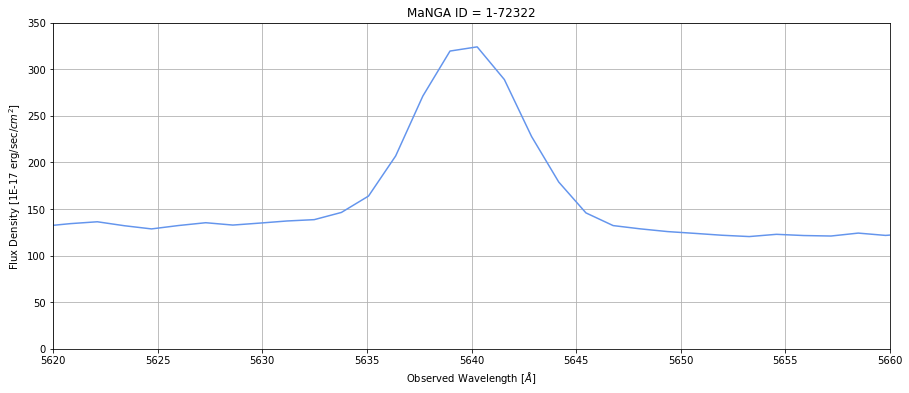

In [13]:
start = 5620
end = 5660
height = 350
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue')
# plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

In [14]:
# select peak region
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
yaxis = yaxis[6:21]
print(yaxis)
print(len(yaxis))

# for i in yaxis:
#     print(wave[i])

# 1912
# sumflux[1912]

[1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928
 1929]
15


In [15]:
flux_compare = [] 
ivar_compare = []
mask_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())
    mask_compare.append(do_not_use[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)
mask_compare = np.array(mask_compare)

len(flux_compare[0]), len(ivar_compare), len(mask_compare[0])

(2916, 15, 2916)

In [16]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        flux_compare_masked = flux_compare[i] * ~mask_compare[i]
        if flux_compare[i][j] != flux_compare_masked[j]:
            print('something')
        # To mask flux_compare by multiplying to the whole mask array. So use i only.
        
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        # Have to mask flux compare -- but mask before or after comparing with sigma ? 
        # My guess = mask first.
        
        if flux_compare_masked[j] < (3 * sigma):
            
            result.append(0)
        else:
            result.append(flux_compare_masked[j])
    sumresult.append(np.sum(result))
    result = []
    
    #True True .... True True

In [17]:
result_unmasked = []
sumresult_unmasked = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        
#         flux_compare_masked = flux_compare[i] * ~mask_compare[i]
        # To mask flux_compare by multiplying to the whole mask array. So use i only.
        
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        # Have to mask flux compare -- but mask before or after comparing with sigma ? 
        # My guess = mask first.
        
        if flux_compare[i][j] < (3 * sigma):
            
            result_unmasked.append(0)
        else:
            result_unmasked.append(flux_compare[i][j])
    sumresult_unmasked.append(np.sum(result_unmasked))
    result_unmasked = []

In [19]:
index = 0 

In [20]:
sumresult[index]

129.69642893970013

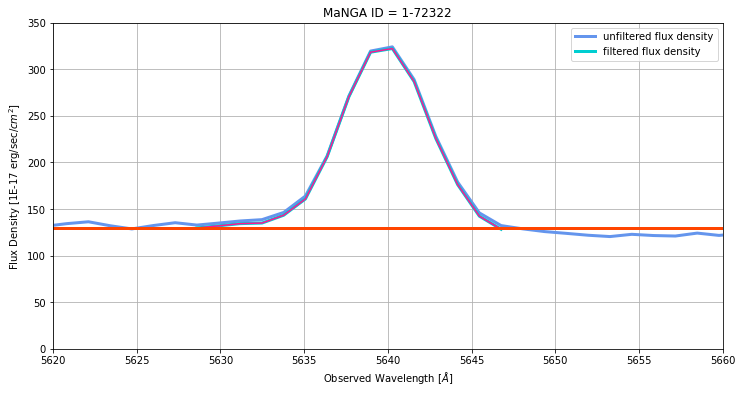

In [21]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, label = 
        'filtered flux density')
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult_unmasked, color = 'deeppink', linewidth = 1.5)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
plt.legend()
# plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

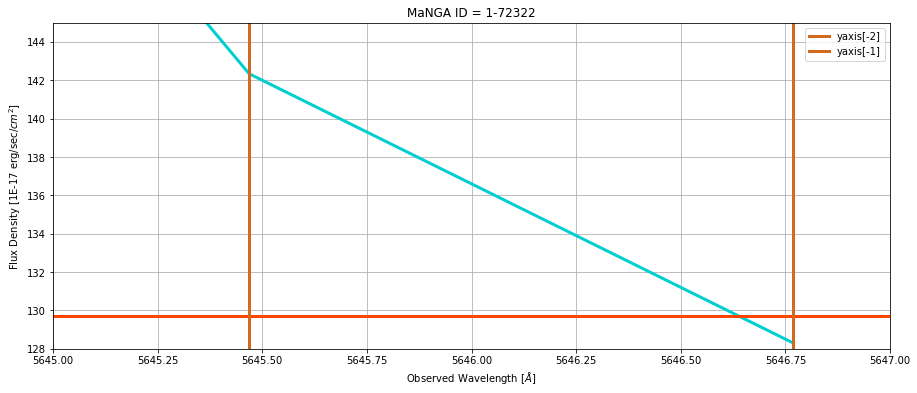

In [17]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(5645, 5647)
plt.ylim(128,145)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [18]:
index2 = np.where(yaxis == yaxis[-2])[0][0]
print(index2)
sumresult[index2]

13


142.33450255729258

In [19]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis[-2]], wave[yaxis[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5645.468649299897, 5646.768716165364]
[142.33450255729258, 128.3023550901562]
142.33450255729258


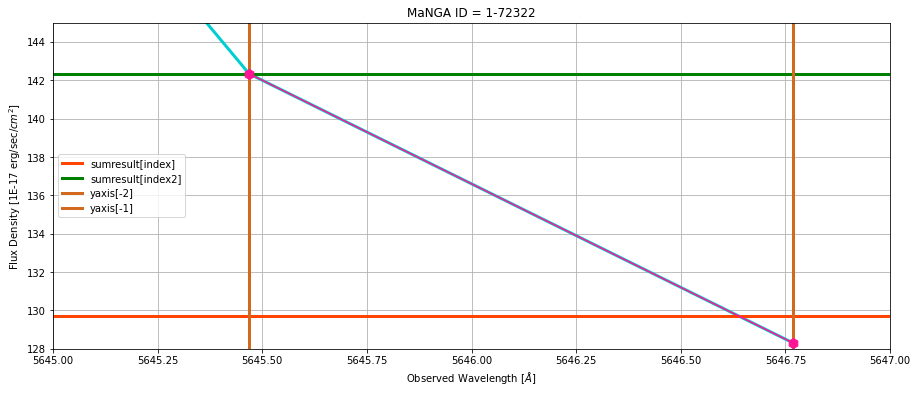

In [20]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(5645, 5647)
plt.ylim(128,145)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'sumresult[index]')
plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.plot(x, y, marker = 'h', ms = 10, color = 'deeppink')



plt.legend()
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [21]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-10.793404431623943

In [22]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

61076.16084050484

In [23]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [24]:
xval = func(sumresult[index], m, c)
xval

129.69642893970013 -10.793404431623943 61076.16084050484


5646.639556375386

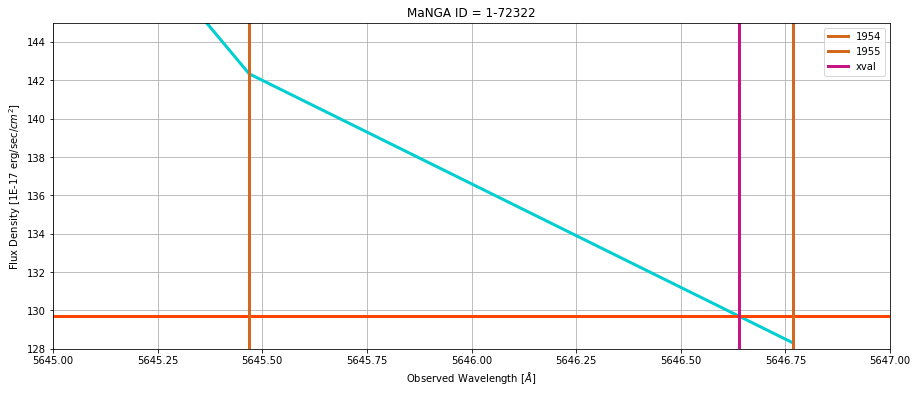

In [25]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(5645, 5647)
plt.ylim(128,145)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = '1954')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = '1955')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = 'xval')

plt.legend()
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [26]:
xcoord = []
ycoord = []

for i in range(yaxis[0], yaxis[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(15, 15, 15)

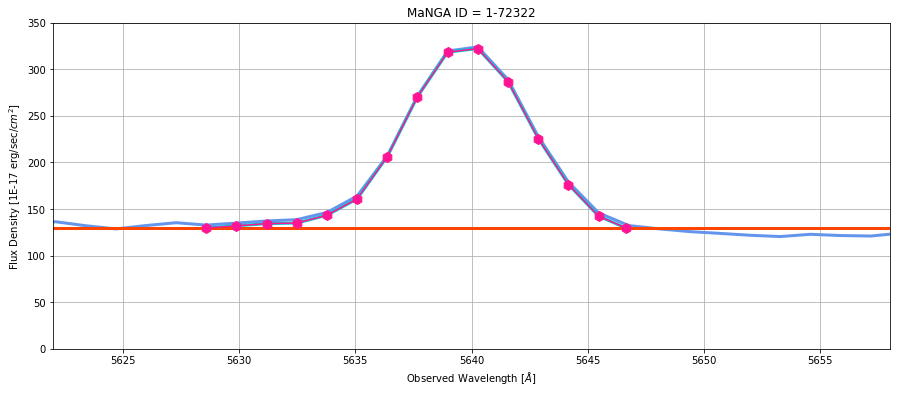

In [27]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start+2, end-2)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.plot(xcoord, ycoord, color = 'deeppink', marker = 'h', ms = 10)
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [28]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [29]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

3595.8439331713776

In [30]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

2340.3154539627685

In [31]:
fluxarea = finalarea - subtract
fluxarea

1255.528479208609

In [32]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.126168

### With the subtraction

In [33]:
luminosity_distance = Mpc_to_cm(590.8)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.823019744e+27 cm / 5.2434746995154335e+41 erg/s (?)


In [34]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [35]:
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

M_BH / M_sol = 13301053.231144005
log(luminosity) = 41.71961917681498
log(M_BH / M_sol) = 7.123886031520744
log(luminosity / sol_lum) = 8.134609896912517


### Without the subtraction

In [36]:
luminosity_without_subtract = luminosity_calc(luminosity_distance, finalarea)
print(luminosity_distance, 'cm', '/', luminosity_without_subtract, ('erg/s (?)'))

1.823019744e+27 cm / 1.5017354842380622e+42 erg/s (?)


In [37]:
print('M_BH / M_sol =',BH_calc(luminosity_without_subtract))
print('log(luminosity) =',np.log10(luminosity_without_subtract))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_without_subtract)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_without_subtract / sol_luminosity))

M_BH / M_sol = 38094326.30006626
log(luminosity) = 42.17659344275305
log(M_BH / M_sol) = 7.580860297458817
log(luminosity / sol_lum) = 8.591584162850591
